In [106]:
## Install LCOE package 
# !py -m pip install "lcoe"   
# #Source of LCOE package: https://pypi.org/project/lcoe/

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from lcoe.lcoe import lcoe

In [108]:
#Read data for summer and winter 
data_summer=pd.read_excel('elspotprices_summer.xlsx')
data_winter=pd.read_excel('elspotprices_winter.xlsx')

In [109]:
#Data Energinet for June
data_summer.rename(columns={'HourDK':'time','SpotPriceEUR':'price_Euro_MWh'}, inplace=True)
data_summer=data_summer[['time','price_Euro_MWh','PriceArea']]
#Data Energinet for January
data_winter.rename(columns={'HourDK':'time','SpotPriceEUR':'price_Euro_MWh'}, inplace=True)
data_winter=data_winter[['time','price_Euro_MWh','PriceArea']]

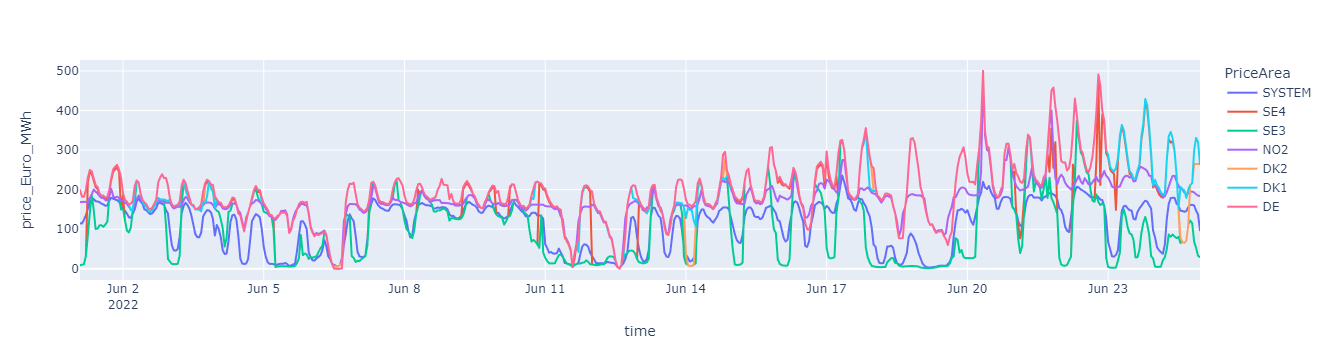

In [110]:
# Plotting summer data
px.line(data_summer,x='time',y='price_Euro_MWh',color='PriceArea')

In [104]:
# Plotting winter data
# px.line(data_winter,x='time',y='price_Euro_MWh',color='PriceArea')

### Simplified LCOE estimations  

In [193]:
#Battery assumptions
CAPEX_battery=420 #$/kwh
Capacity_ESS = 4000 #kWh
cycles_year=365
DoD= 0.9 # Depth of discharge %
Effi= 0.9 # Efficiency %

#LCOE assumptions
capital_cost = CAPEX_battery*Capacity_ESS  # $
operating_cost = capital_cost*0.1  #$/year
discount_rate = 0.07  # %
lifetime = 15  # years
ussableCap=Capacity_ESS*DoD*Effi
annual_output= ussableCap*cycles_year # kwh

#LCOE calculations
cost_kWh=lcoe(annual_output, capital_cost, operating_cost, discount_rate, lifetime)

#Levelized cost per MWh
cost_MWh=cost_kWh*1000
cost_MWh

298.0339671044232

### Estimated Revenue for peak shaving C&I battery 

In [196]:
#Business case revenue calculations using summer data

ussableCapMWh=ussableCap/1000 #Resize capacity for calculation

#Revenue High case: June 20th

# High price peak from 6 am til 10 am
# Our target is to shave those 4h with a battery. 

Volumes_shave=[1,1,1,1] #MWh to be shaved
Price_shave_hc=[301.67,368.9,500,348.28] #prices at 6,7,8,9 am #Eur/Mwh

#Target to store energy from mindnight til 3 am
Volumes_store=[1,1,1,1] # MWh to be stored
Price_store_hc=[27.37,26.35,26.7,27.15] #prices at mightnight,1,2,3 am #Eur/Mwh


data_price_hc={'price_shave':Price_shave_hc,'price_store':Price_store_hc}

df_price_hc=pd.DataFrame(data_price_hc,index=range(1,5))
Revenue_hc = sum(Volumes_shave*df_price_hc['price_shave'])-sum(Volumes_store*df_price_hc['price_store'])




#Revenue Low case: June 8th

# Low price from 00:00  til 3 am
# Our target is to store those 4h with a battery. 

Volumes_shave=[1,1,1,1] #MWh to be shaved
Price_shave_lc=[138.95,200.05,185.05,198.93] #prices at 6,7,8,9 am  #Eur/Mwh

#Target to store energy from mindnight til 3 am
Volumes_store=[1,1,1,1] # MWh to be stored
Price_store_lc=[121.6,101.3,94.55,86.23] #prices at mightnight,1,2,3 am #Eur/Mwh


data_price_lc={'price_shave':Price_shave_lc,'price_store':Price_store_lc}

df_price_lc=pd.DataFrame(data_price_lc,index=range(1,5))
Revenue_lc = sum(Volumes_shave*df_price_lc['price_shave'])-sum(Volumes_store*df_price_lc['price_store'])

RevenueAvg=(Revenue_hc+Revenue_lc)/2
Yearly_AvgRevenue=RevenueAvg*365*0.95
Payback_period=(Capacity_ESS*CAPEX_battery)/Yearly_AvgRevenue

5.59926635612569

In [201]:
print('Average Revenue',RevenueAvg)

Average Revenue 865.29


##### Results
- LCOE = 248.36 Euros/kWh
- Payback period = 4.43 years
- Asset lifetime = 10+ years


